# Aproximación Polinomial con Mínimos Cuadrados
Ejercicio:

Ajustar a un polinomio de segundo grando los datos dados en la tabla siguiente.

In [24]:
# importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
x = np.array([0, 1, 2, 3, 4, 5])
fx = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])


La tabla es la siguiente:

In [3]:
pd.DataFrame({'x':x ,'f(x)':fx})

,x,f(x)
0,0,2.1
1,1,7.7
2,2,13.6
3,3,27.2
4,4,40.9
5,5,61.1


Algunos cálculos:

In [11]:
n = x.shape[0] # número de datos de x
xx = x * x
xxx = xx * x
xxxx = xxx * x 
xfx = x * fx
x2fx = x**2 * fx

sx = np.sum(x)
sfx = np.sum(fx)
sxx = np.sum(xx)
sxxx = np.sum(xxx)
sxxxx = np.sum(xxxx)
sxfx = np.sum(xfx)
sx2fx = np.sum(x2fx)

Construimos la siguiente tabla:

In [5]:
df = pd.DataFrame({'x':x ,'f(x)':fx,'x^2':xx ,'x^3':xxx ,'x^4':xxxx ,'x*f(x)':xfx,'x^2*f(x)':x2fx})
df.loc['Suma'] = df.sum(axis = 0)
df

,x,f(x),x^2,x^3,x^4,x*f(x),x^2*f(x)
0,0.0,2.1,0.0,0.0,0.0,0.0,0.0
1,1.0,7.7,1.0,1.0,1.0,7.7,7.7
2,2.0,13.6,4.0,8.0,16.0,27.2,54.4
3,3.0,27.2,9.0,27.0,81.0,81.6,244.8
4,4.0,40.9,16.0,64.0,256.0,163.6,654.4
5,5.0,61.1,25.0,125.0,625.0,305.5,1527.5
Suma,15.0,152.6,55.0,225.0,979.0,585.6,2488.8


In [35]:
Coef = np.matrix([[n,sx,sxx],[sx,sxx,sxxx],[sxx,sxxx,sxxxx]])
Ter_i = np.matrix([[sfx],[sxfx],[sx2fx]])
Sol = Coef**-1 * Ter_i
a2 = Sol[2,0]
a1 = Sol[1,0]
a0 = Sol[0,0]

La polinomio que buscamos es: 

In [14]:
print("p(x) = {} * x^2 + {} * x + {}".format(round(a2,6),round(a1,6),round(a0,6)))

p(x) = 1.860714 * T^2 + 2.359286 * T + 2.478571


Graficamos:

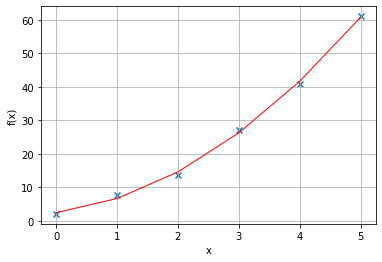

In [57]:
polinomio = lambda t: a2 * t**2 + a1 * t + a0
plt.plot(x, polinomio(x),c ="red",lw=1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.scatter(x,fx, marker="x")
plt.grid('on')